# **PHASE 1 TASK: CUSTOMER SEGMENTATION FOR PERSONALIZED MARKETING**

From the below code, the code reads customer data, selects relevant features, scales the features, applies K-Means clustering to create segments, adds cluster labels to the original dataset, and analyzes the characteristics of each segment in terms of selected features. The goal is to identify patterns and differences among customer segments for targeted marketing or other business strategies.







In [15]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load customer data
data = pd.read_csv('/content/E-commerce Customer Behavior - Sheet1.csv')

# Select relevant features for segmentation
selected_features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied', 'Days Since Last Purchase']

# Preprocess and scale the selected features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[selected_features])

# Apply KMeans clustering
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42, n_init=10)
kmeans.fit(scaled_data)

# Add the cluster labels to the original dataset
data['Cluster'] = kmeans.labels_

# Analyze the segments and their characteristics
segment_analysis = data.groupby('Cluster')[selected_features].mean()
print(segment_analysis)




               Age  Total Spend  Items Purchased  Average Rating  \
Cluster                                                            
0        29.837607   929.741026        13.470085        4.238462   
1        35.401709   627.725641         9.641026        3.687179   
2        29.120690  1459.772414        20.000000        4.808621   
3        42.017241   499.882759         9.413793        3.456897   

         Discount Applied  Days Since Last Purchase  
Cluster                                              
0                     1.0                 34.957265  
1                     0.0                 18.982906  
2                     0.0                 11.172414  
3                     1.0                 40.465517  


To create a scatter plot to visualize the customer segmentation based on two selected features: 'Total Spend' and 'Average Rating'.

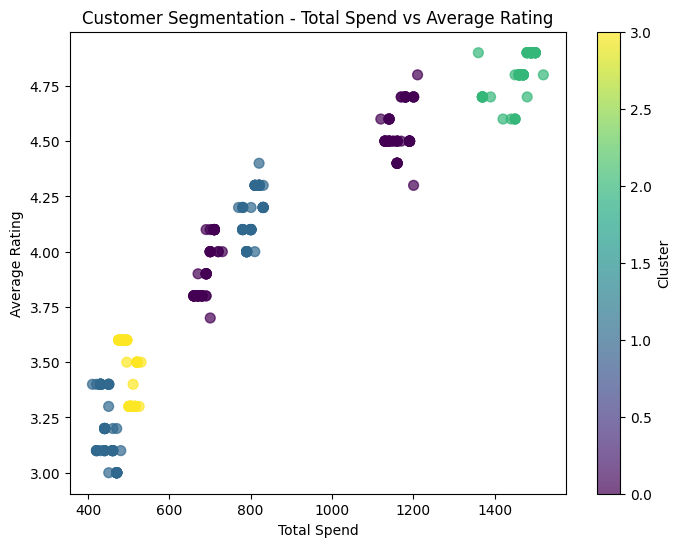

In [16]:
# Visualize clusters for two selected features
plt.figure(figsize=(8, 6))
plt.scatter(data['Total Spend'], data['Average Rating'], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.7)
plt.xlabel('Total Spend')
plt.ylabel('Average Rating')
plt.title('Customer Segmentation - Total Spend vs Average Rating')
plt.colorbar(label='Cluster')
plt.show()

The code uses Seaborn to create a bar plot visualizing the average feature values for each cluster.

<Figure size 1200x800 with 0 Axes>

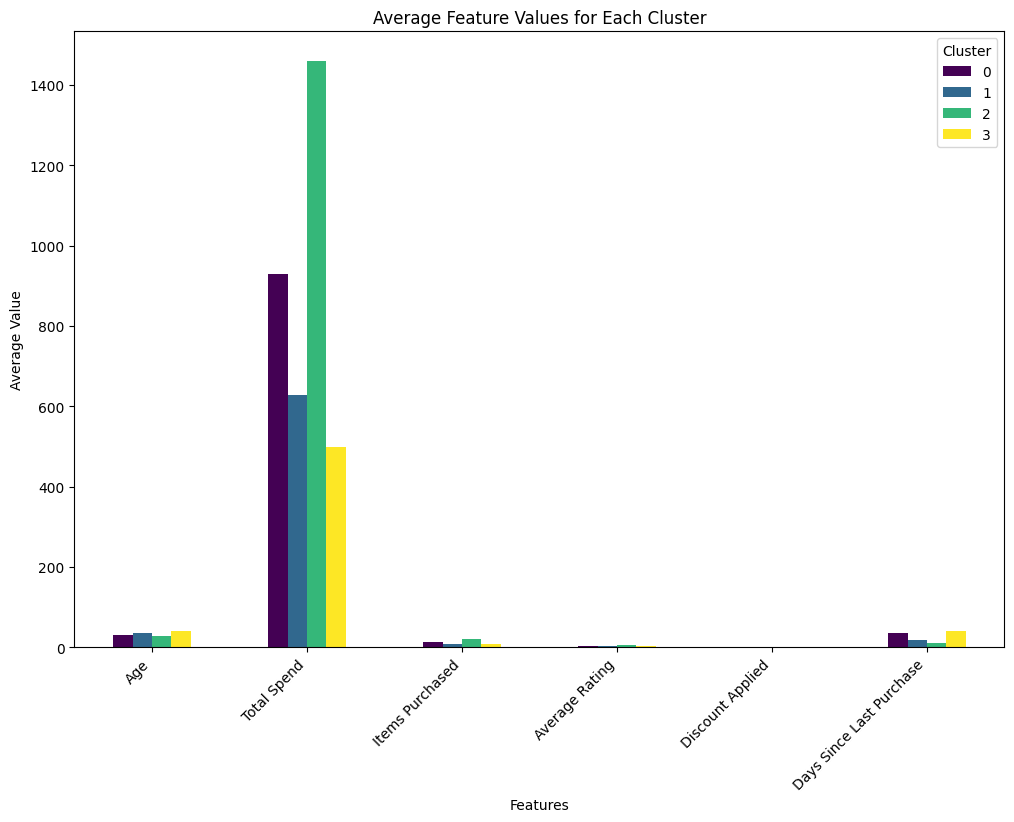

In [17]:
import seaborn as sns
segment_analysis_transposed = segment_analysis.T

# Plotting
plt.figure(figsize=(12, 8))
sns.set_palette("viridis", num_clusters)
segment_analysis_transposed.plot(kind='bar', colormap='viridis', figsize=(12, 8))
plt.title('Average Feature Values for Each Cluster')
plt.ylabel('Average Value')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Cluster')
plt.show()


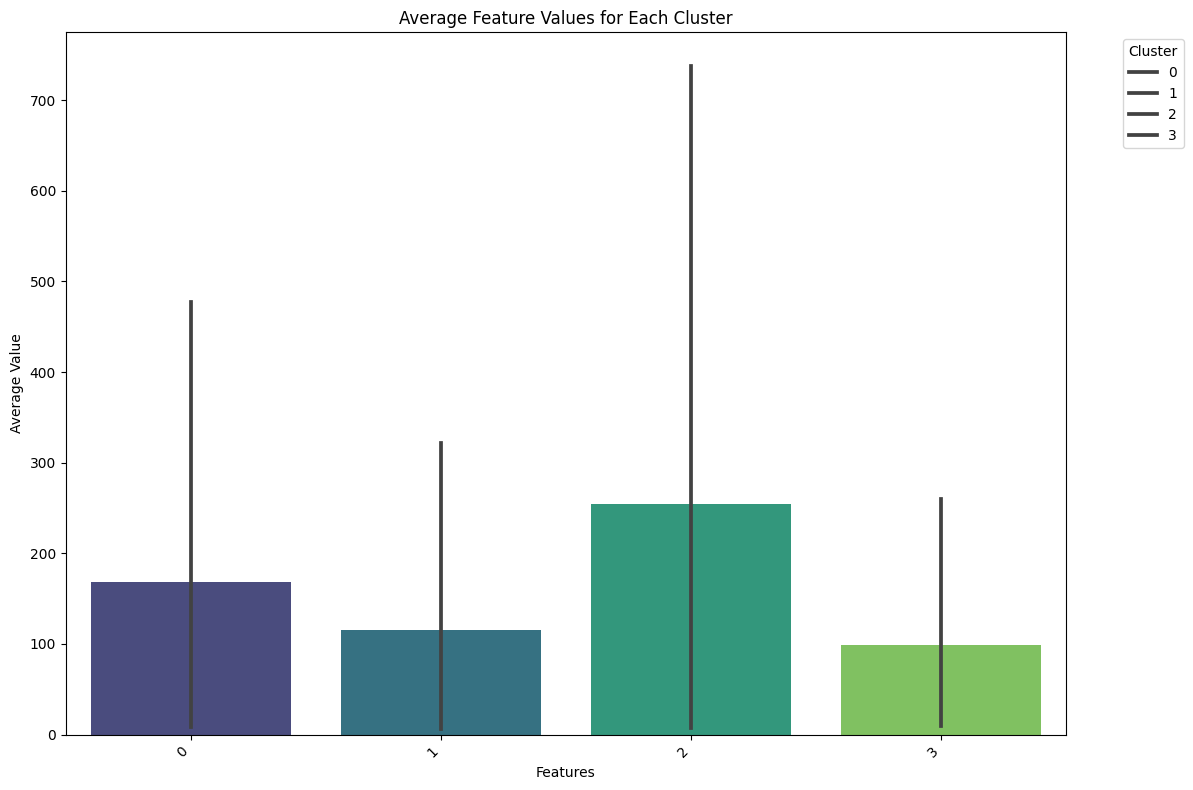

In [18]:
plt.figure(figsize=(12, 8))
sns.barplot(data=segment_analysis_transposed, palette='viridis')
plt.title('Average Feature Values for Each Cluster')
plt.ylabel('Average Value')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')


plt.legend(title='Cluster', labels=segment_analysis_transposed.columns, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
